In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [9]:
# load dataset (300,000 datapoints)
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/flights_table(300,000_points).csv',delimiter=';')
data = data.iloc[: , 1:]

In [10]:
# drop all cancelled and diverted flights
filter1 = (data['cancelled']!=1) & (data['diverted']!=1)
data = data[filter1]

# drop outliers
data = data[(data['arr_delay']<50) & (data['arr_delay']>-50)]
data = data[(data['dep_delay']<50) & (data['dep_delay']>-50)]

#Adding date time features and state
data['month'] = pd.DatetimeIndex(data['fl_date']).month
data['year'] = pd.DatetimeIndex(data['fl_date']).year
data['day'] = pd.DatetimeIndex(data['fl_date']).day
data['origin_city_state'] = data['origin_city_name'].transform(lambda x: str(x).split(',')[1])
data['origin_city'] = data['origin_city_name'].transform(lambda x: str(x).split(',')[0])
data['dest_city_state'] = data['dest_city_name'].transform(lambda x: str(x).split(',')[1])
data['dest_city'] = data['dest_city_name'].transform(lambda x: str(x).split(',')[0])
data['depart_hour'] = data['dep_time'].round(-2)


In [11]:
data.shape

(267005, 50)

Text(0.5, 1.0, 'dep_delay_2019')

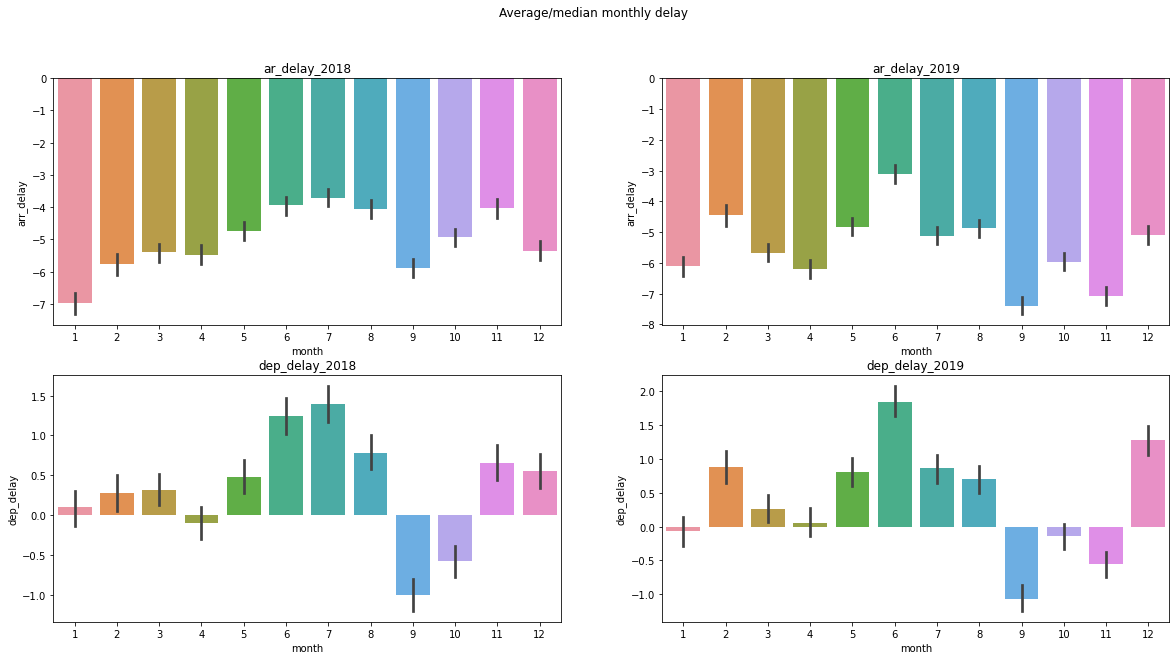

In [13]:
#create charts
fig, axes = plt.subplots(2, 2,figsize=(20,10))
fig.suptitle('Average/median monthly delay')

#arr_delay_2018
filter1 = data['year'] == 2018
sns.barplot(x='month',y='arr_delay',data=data[filter1],ax=axes[0,0])
axes[0,0].set_title('ar_delay_2018')

#arr_delay_2019
filter2 = data['year'] == 2019
sns.barplot(x='month',y='arr_delay',data=data[filter2],ax=axes[0,1])
axes[0,1].set_title('ar_delay_2019')

#dep_delay_2018
filter1 = data['year'] == 2018
sns.barplot(x='month',y='dep_delay',data=data[filter1],ax=axes[1,0])
axes[1,0].set_title('dep_delay_2018')

#dep_delay_2019
filter2 = data['year'] == 2019
sns.barplot(x='month',y='dep_delay',data=data[filter2],ax=axes[1,1])
axes[1,1].set_title('dep_delay_2019')